<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/clustering/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means(K평균)
: 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법



#K-means 군집화 과정

1. 군집화의 기준이 되는 중심을 구성하려는 군집화 개수(K)만큼 임의의 위치에 가져다 놓습니다.
- 임의의 위치에 군집 중심점을 가져다 놓으면 반복적인 이동 수행을 많이 해서 수행 시간이 오래 걸리기 때문에 초기화 알고리즘으로 적합한 중심점을 가져다 놓게됩니다.
(여기에는 임의의 위치로 가정)

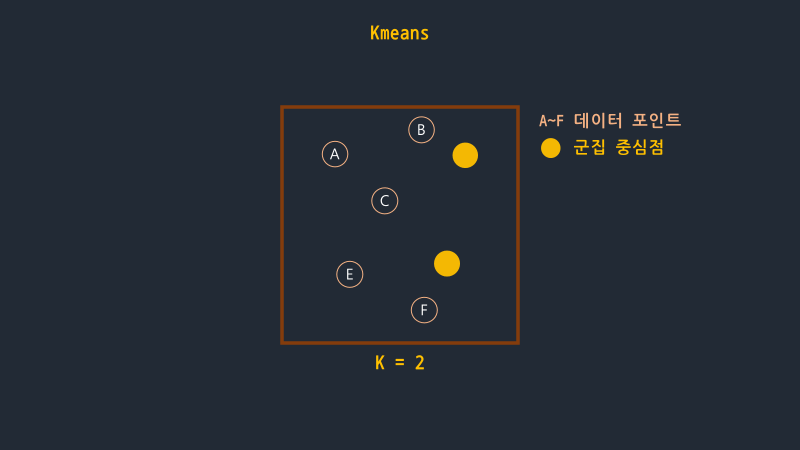

2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속이 됩니다.

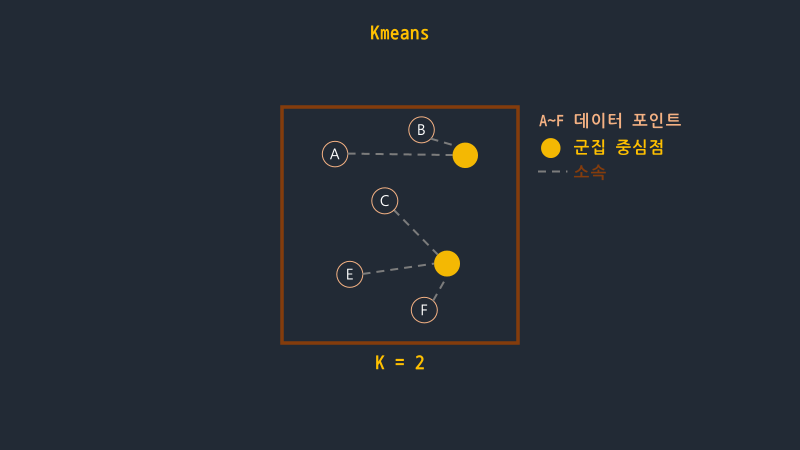

3. 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동합니다.

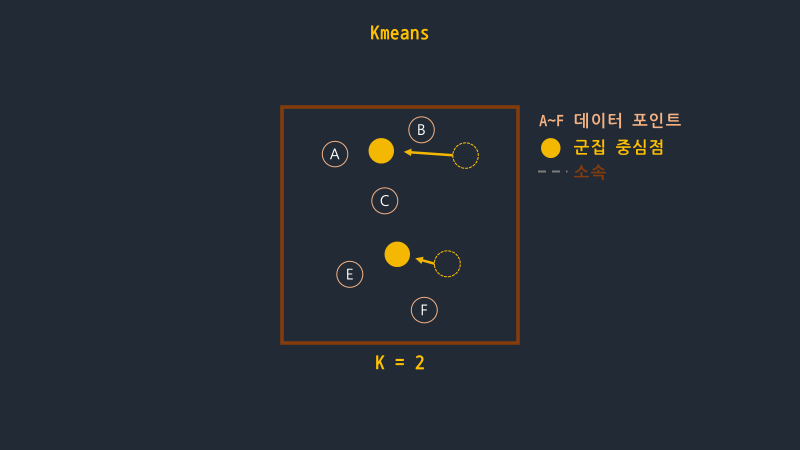


4. 중심점이 이동했기 때문에 **각 데이터는 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속을 변경**합니다.

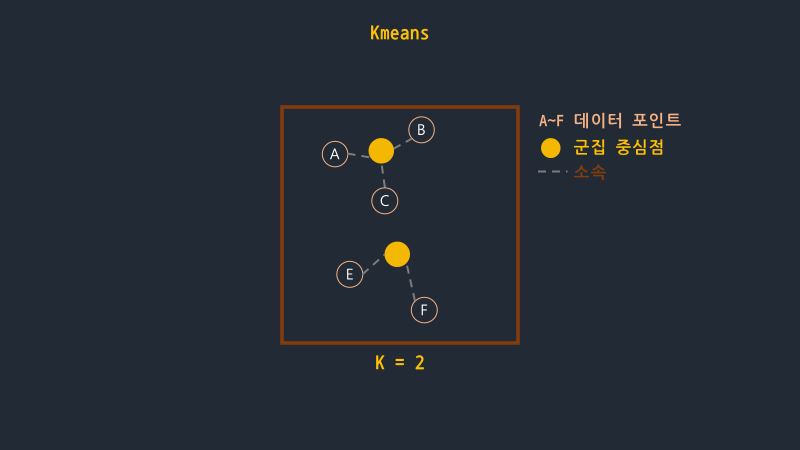

5. 다시 중심이 소속된 **데이터의 평균 중심**으로 이동합니다.

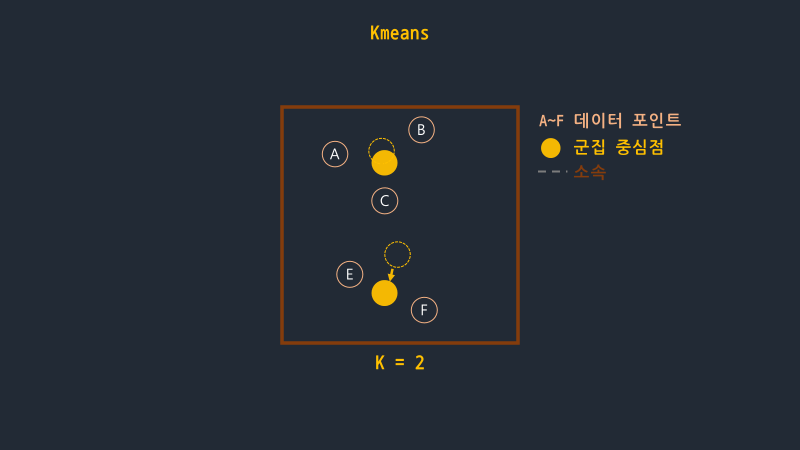

6. 중심점을 이동하고 데이터의 중심점 소속 변경이 없으면 군집화를 종료합니다.(여기서는 없다고 가정하지만 있다면 4, 5번의 과정을 반복)

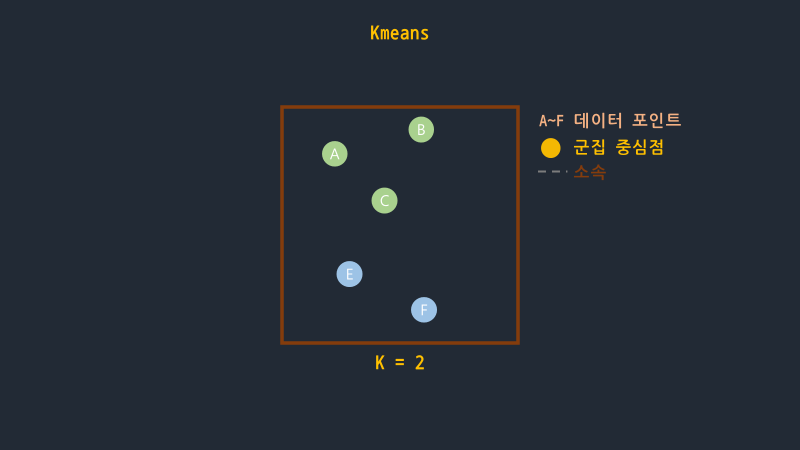

# 장점과 단점

## 장점

일반적으로 많이 활용이 되며 알고리즘이 쉽고 간결하다.

## 단점

거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어집니다.(이를 위해서 PCA로 차원 축소를 적용해야 할 수도 있습니다.)

반복을 수행하므로 반복 횟수가 많을경우 수행 시간이 오래걸린다.

몇 개의 군집(K)를 선택해야 할지 어렵다.

# 코드 구현

## 사이킷런의 Kmeans 클래스

###주요 파라미터

- `n_clusters` : 가장 중요한 파라미터, 군집 중심점의 개수(군집의 개수)

- `init` : 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의의 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정
  - `init = k-means++` 
  - kmeans++ : kmeans의 중심점을 무작위 위치로 선정하는 문제점을 해결하기 위한 알고리즘
    1. 가지고 있는 데이터 포인트중에서 무작위로 1개를 선택하여 첫번째 중심점으로 지정
    2. 나머지 데이터 포인트들에 대해 그 첫번째 중심점 까지의 거리를 계산
    3. 두번째 중심점은 각 점들로부터 거리비례 확률을 따라 선택한다.
      - **이미 지정된 중심점으로부터 최대한 먼 곳에 배치된 데이터포인트를 그 다음 중심점으로 지정**
    4. 중심점이 k개가 될때까지 2,3번을 반복
- `max_iter` : 최대 반복 횟수이며, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료
  - default = 300

## 주요 속성
- `labels` : 각 데이터 포인트가 속한 군집 중심점(레이블)
- `cluster_centers_` : 각 군집 중심점 좌표, 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 할 수 있음

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
#k = 3, 3개의 군집으로 군집화
#kmeans++ 를 사용
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(iris_df)

print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [36]:
#데이터 프레임에 labels_ 추가
iris_df['cluster'] = kmeans.labels_
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [37]:
# 군집화를 효과적으로 되었는지 확인
iris_df['target'] = iris.target

iris_df.groupby(['target', 'cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [38]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


분류 target 0값인 데이터는 1번 군집으로 모두 그룹핑이 되었습니다.  
target 1값은 2개의 데이터만 0번 군집, 2번 군집으로 그룹핑이 되었고,  
target 2값에서는 0번 군집에 36개, 2번 군집에 14개 그룹핑이 되었습니다.

In [39]:
#pca로 2차원으로 차원축소를 진행한뒤에 그래프로 시각화
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
iris_df['pc1'] = pca_transformed[:,0]
iris_df['pc2'] = pca_transformed[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pc1,pc2
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


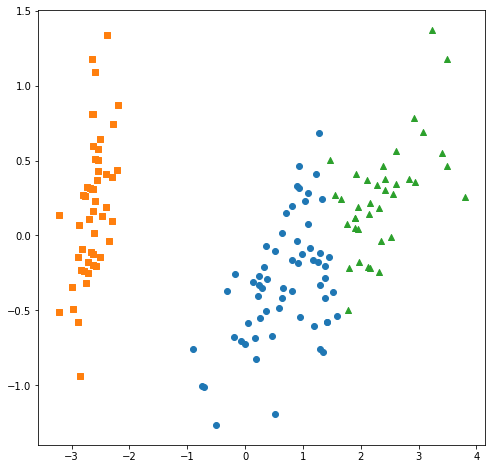

In [40]:
#시각화
#군집 값이 0,1,2인 경우마다별도의 인덱스를 추출
marker0_ind = iris_df[iris_df['cluster'] == 0].index
marker1_ind = iris_df[iris_df['cluster'] == 1].index
marker2_ind = iris_df[iris_df['cluster'] == 2].index


plt.figure(figsize=(8,8))
#군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pc1, pc2값 추출
#marker='o', 's', '^' 표시
plt.scatter(x = iris_df.loc[marker0_ind, 'pc1'], y=iris_df.loc[marker0_ind, 'pc2'], marker='o')
plt.scatter(x = iris_df.loc[marker1_ind, 'pc1'], y=iris_df.loc[marker1_ind, 'pc2'], marker='s')
plt.scatter(x = iris_df.loc[marker2_ind, 'pc1'], y=iris_df.loc[marker2_ind, 'pc2'], marker='^')

plt.show()

군집 1을 나타내는 's' 는 명확하게 다른 군집으로 잘 분리가 되어있고,  
군집 0과 군집 2를 나타내는 동그라미와 세모는 분리가 되어있지만 명확하게 부리가 되어있지 않음을 알 수 있습니다.

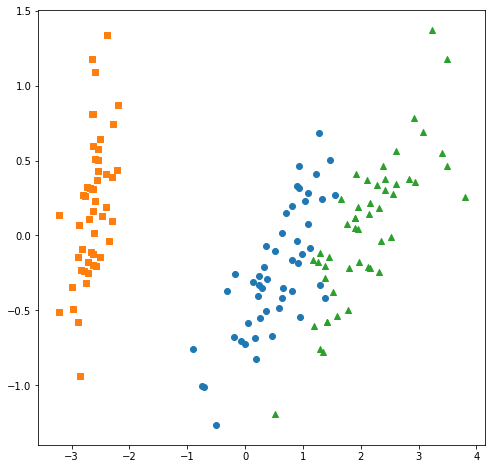

In [43]:
#실제 데이터 타겟 시각화
marker0_ind_tar = iris_df[iris_df['target'] == 1].index
marker1_ind_tar = iris_df[iris_df['target'] == 0].index
marker2_ind_tar = iris_df[iris_df['target'] == 2].index

plt.figure(figsize=(8,8))
plt.scatter(x = iris_df.loc[marker0_ind_tar, 'pc1'], y=iris_df.loc[marker0_ind_tar, 'pc2'], marker='o')
plt.scatter(x = iris_df.loc[marker1_ind_tar, 'pc1'], y=iris_df.loc[marker1_ind_tar, 'pc2'], marker='s')
plt.scatter(x = iris_df.loc[marker2_ind_tar, 'pc1'], y=iris_df.loc[marker2_ind_tar, 'pc2'], marker='^')

plt.show()